# PRCP-1016-HeartDieseasePred
## HEART DISEASE PREDICTION

### Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

Task 3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.


### Summary

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### Goal -  The classification goal is to predict if the patient has heart disease (1) or doesn't have heart disease(0).  


### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('values.csv')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


### Basic Checks

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [4]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [5]:
data.describe(include='O').T

,count,unique,top,freq
patient_id,180,180,0z64un,1
thal,180,3,normal,98


In [6]:
num_col=data.select_dtypes(include=['int64','float64'])
num_col

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,180,4,0,0,1,327,3.4,0,55,117,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0


In [7]:
cat_col=data.select_dtypes(include=['object'])
cat_col

,patient_id,thal
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect
...,...,...
175,5qfar3,reversible_defect
176,2s2b1f,normal
177,nsd00i,reversible_defect
178,0xw93k,normal


In [8]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [9]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [10]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [11]:
len(data)

180

In [12]:
data.shape

(180, 14)

## Task 1:-Prepare a complete data analysis report on the given data.
## Exploratory Data Analysis [EDA]
### Univariate Analysis

In [13]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

## Insights on Univariate analysis

 **Patient-Id**
 - This is a unique feature.
 - This columns contains 180 unique values and every value is distinct.There are no missing values.

**slope of peak exercise st-segment**
 - Most patients have a flat (52%) or up-sloping (42%) ST segment, with a smaller proportion having a down-sloping segment (7%). 
 - This distribution might suggest that the majority of patients do not exhibit the more concerning down-sloping ST segment, which is often associated with worse outcomes.
 
**Thal / Thallium Stress test**
 - Most patients have a normal result (54%) on the thallium stress test, followed by reversible defect (41%), and a small portion has a fixed defect (4%). 
 - This distribution suggests that a majority of patients do not show severe abnormalities, while a notable portion shows reversible defects, which could be indicative of transient ischemia.
 
**Resting Blood Pressure**
 - The most common range of resting blood pressure is 120, 122 and 130, stating that significant portion of the dataset has resting blood pressure in the range of 120-130 mmHg.
 - This suggests that many individuals in the dataset might have borderline or mildly elevated resting blood pressure.
 
**Chest pain type**
 - Type 4 chest pain is the most common, accounting for nearly half of the instances.
 - Type 2 and 3 are also quite prevalent, while type 1 is least common.
 
**Number of major vessels**
 - The majority of patients (59%) have no major vessels coloured by fluoroscopy.
 - 21% of individuals have have one major vessel colored.
 - 13% have 2 major vessel colored.
 - Only 3% have 3 majore vessel covered.

**Fasting blood sugar greater than 120mg/dl**
 - 84% of the individuals have fasting bloodsugar greater than 120mg/dl and 16% posses blood sugar greter than 120mg/dl.
 
**Resting EKG results**
 - Over half of the individuals(52%) fall inti category 2 for EKG results.
 - 47% of patients fall into category 0 which indiates normal category.
 - Category 1 is rare, with les than 1% of patients falling into this this category.
 
**Serum cholesterol_mg_per_dl**
 - The most frequemtly observed Cholestrol values(204 and 239mg/dl) are seen in 2.2% of the data set.
 - There is a broad range of cholestrol values, from as low as 126mg/dl to 524mg/dl indicating significant variability.

**Oldpeak ST depression**
 - A significant amount (31%) of individuals show signs of depression.
 - Around 23% individuals fall in the mild or moderate range of depression which may lead to ischemia.
 - Another 25% exhibit mild to severe range and remaining around 13% fall in critical stage.
 
**Sex**
 - More than 69% individuals are male.
 - Remaining 31% are females.
 
**Age**
 - The most recurring ages are 58 and 54 occuring upto 6.7% .
 - Other common ages 44, 51, and 57 make up around 5% of cases.
 - the least occuring ages are34 and 48.

**Max Heart Rate**
 - Most frequent observation is 162, occuring for 5.6%.
 
**Exercise induced angina**
 - Around 68% of individuals does not posses exercise induced angina and remaining 32% posses the risk to ischemia.

## Bivariate Analysis

### For numerical columns

In [15]:
data1=pd.read_csv('labels.csv')
merged_df=pd.merge(data,data1,on='patient_id')

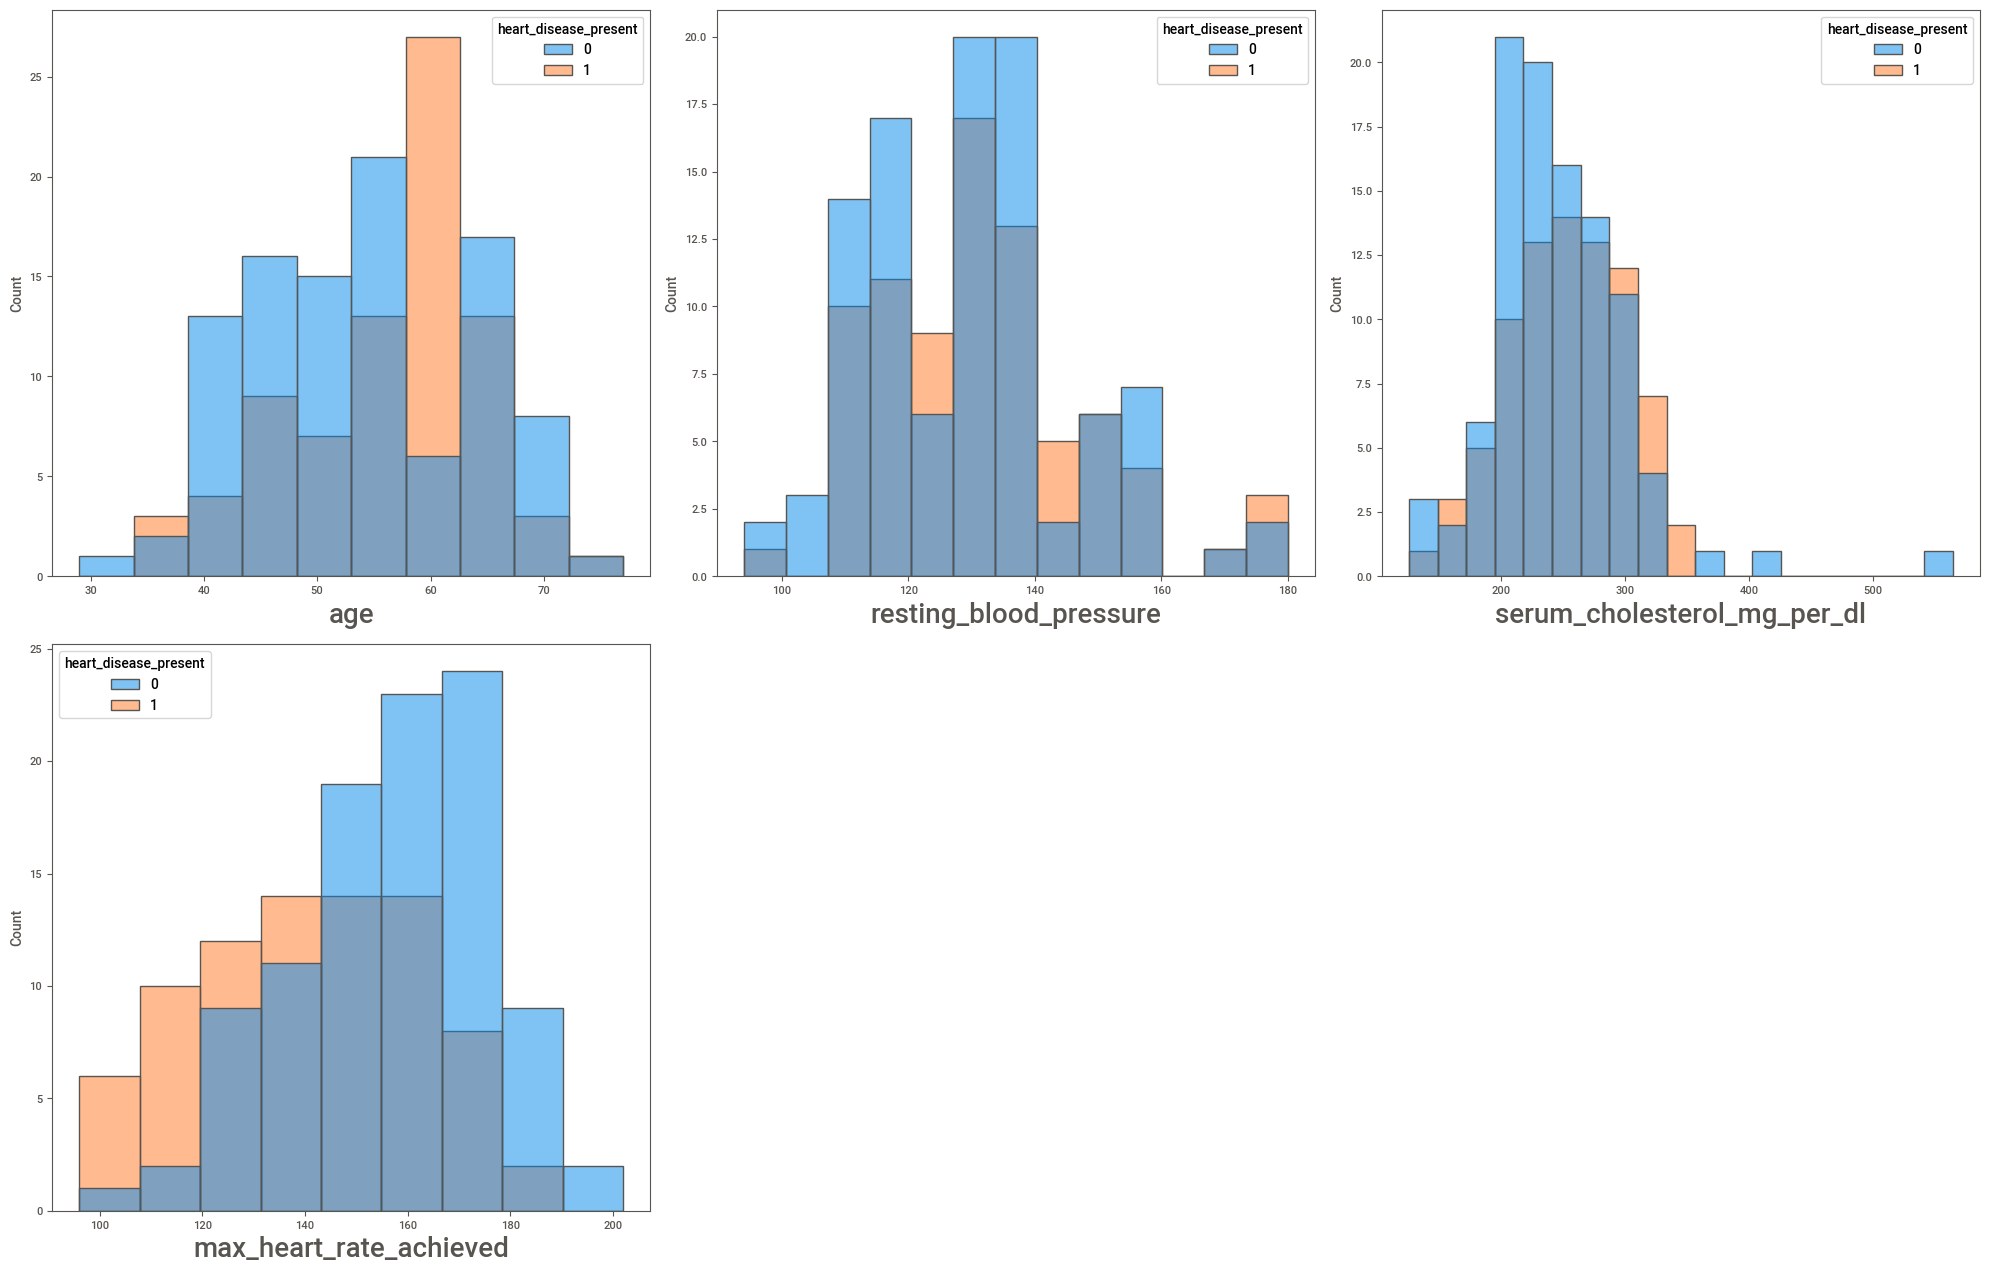

In [16]:
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in numerical_features:
    if plotnumber<=4:
        ax=plt.subplot(4,3,plotnumber)
#         sns.histplot(x=data[column],kde=True)
        sns.histplot(x=column,data=merged_df,hue='heart_disease_present')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### For Categorical Columns


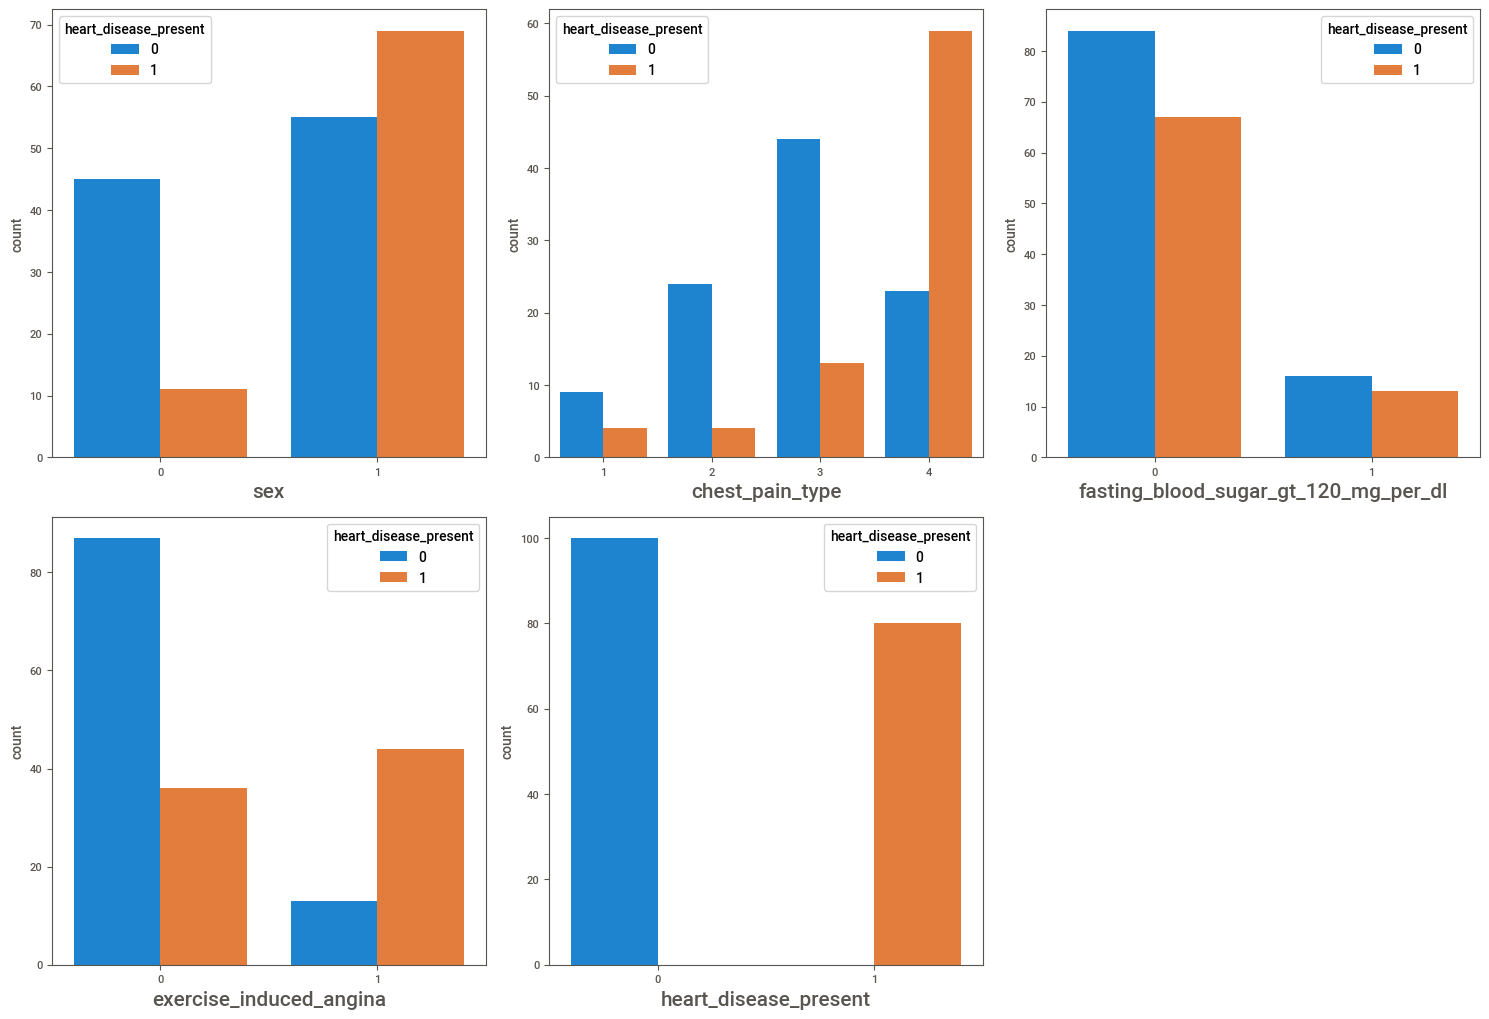

In [17]:
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar_gt_120_mg_per_dl', 'exercise_induced_angina','heart_disease_present']
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1

for column in categorical_features:
    if plotnumber<=5:
        ax=plt.subplot(4,3,plotnumber)
        sns.countplot(x=column,data=merged_df,hue='heart_disease_present')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Insights on Bivariate Analysis

**Sex/ Gender**
 - Higher proportion of Males having heart disease compared to Females.
 
**Chest pain type**
 - Type 4 chest pain having higher chance of Heart disease.
 
**Fasting Blood Sugar > 120**
 - It seems that hogher fasting blood sugar levels are associated with a higher presence of heart disease.
 
**Exercise Induced Angina**
 - The comparison shows that exercise induced angina is more among individuals with heart disease.
 
**Heart disease Presence**
 - This comparison shows that the majority of the individuals do not have heart disease.where as there is a significant amoutn of individuals also having heart disease.

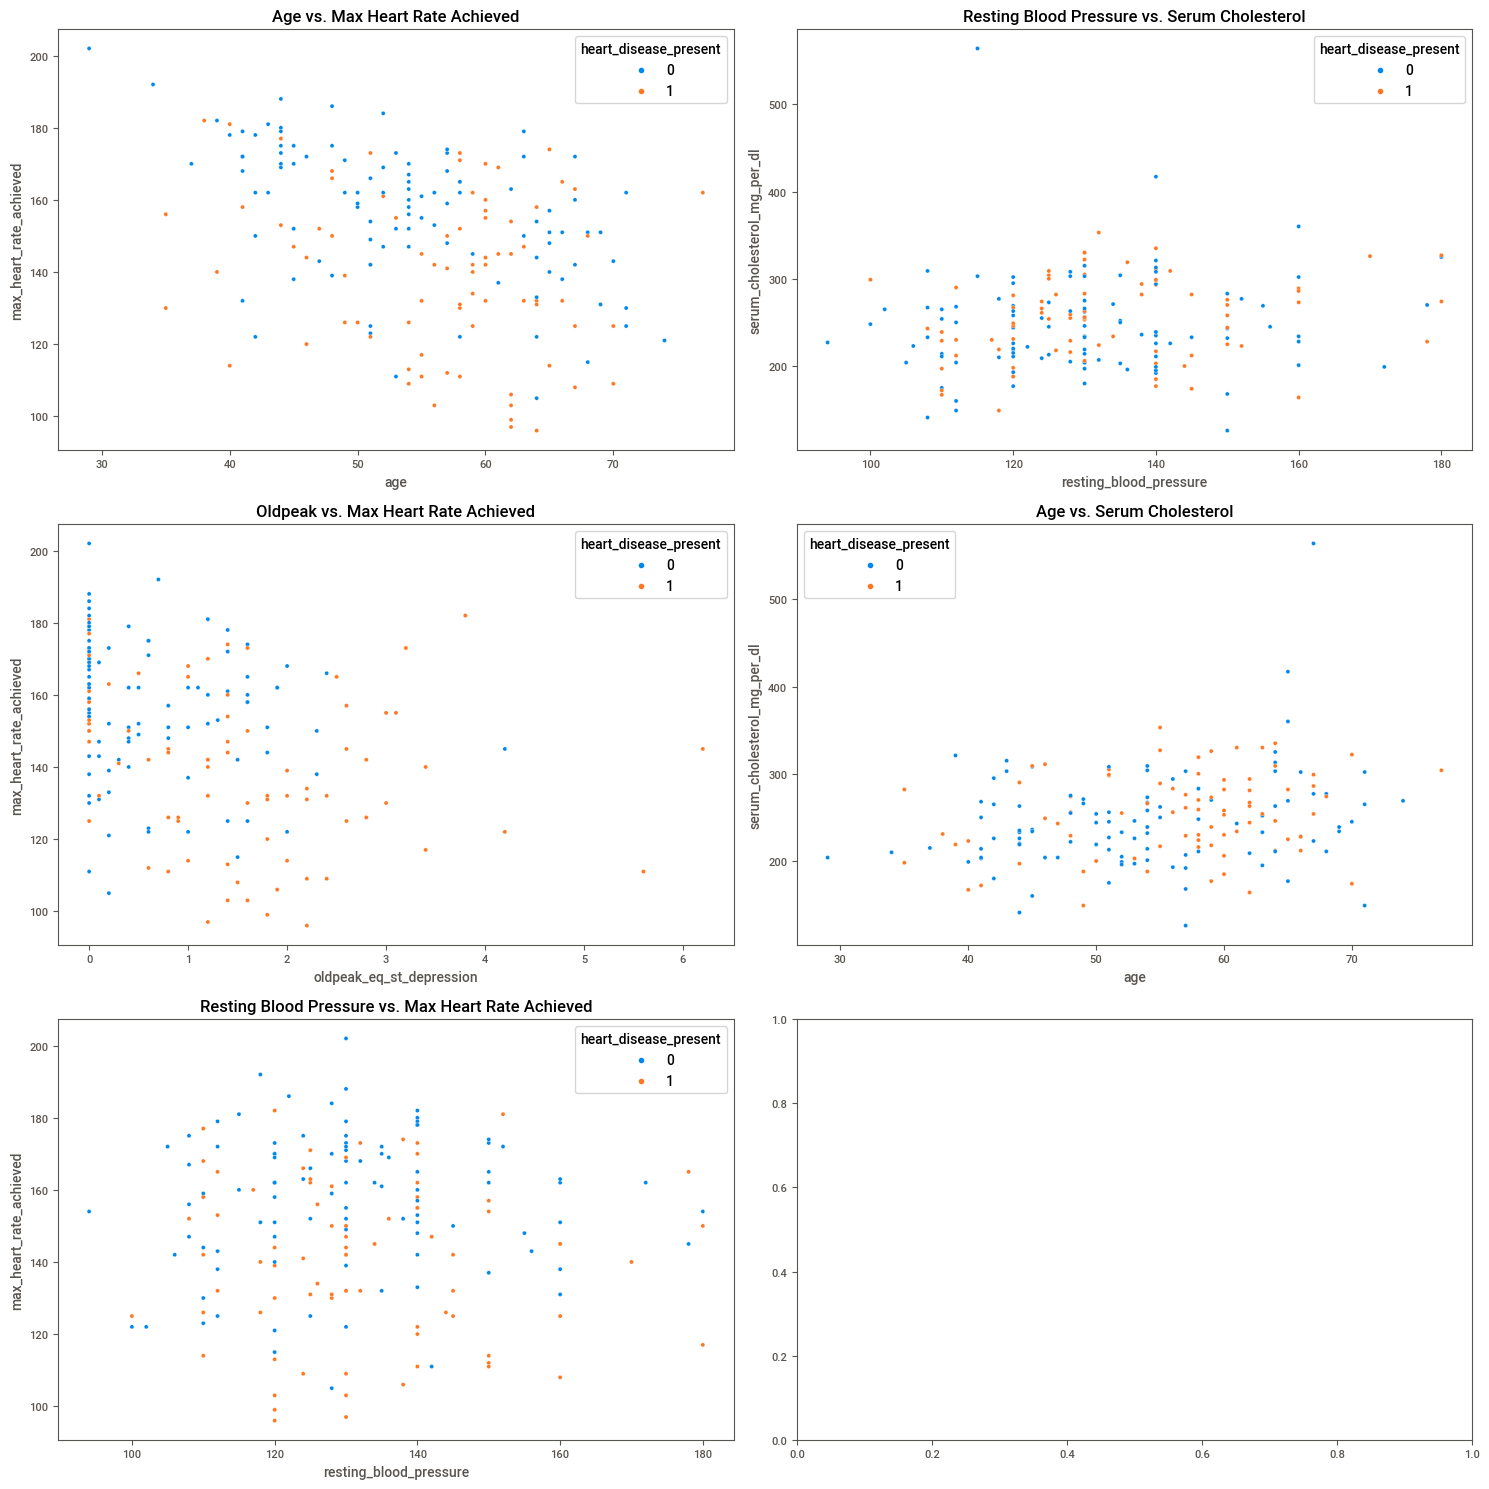

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot for Age vs. Max Heart Rate Achieved
sns.scatterplot(x='age', y='max_heart_rate_achieved', hue='heart_disease_present', data=merged_df, ax=axs[0, 0])
axs[0, 0].set_title('Age vs. Max Heart Rate Achieved')

# Scatter plot for Resting Blood Pressure vs. Serum Cholesterol
sns.scatterplot(x='resting_blood_pressure', y='serum_cholesterol_mg_per_dl', hue='heart_disease_present', data=merged_df, ax=axs[0, 1])
axs[0, 1].set_title('Resting Blood Pressure vs. Serum Cholesterol')

# Scatter plot for Oldpeak (ST Depression) vs. Max Heart Rate Achieved
sns.scatterplot(x='oldpeak_eq_st_depression', y='max_heart_rate_achieved', hue='heart_disease_present', data=merged_df, ax=axs[1, 0])
axs[1, 0].set_title('Oldpeak vs. Max Heart Rate Achieved')

# Scatter plot for Age vs. Serum Cholesterol
sns.scatterplot(x='age', y='serum_cholesterol_mg_per_dl', hue='heart_disease_present', data=merged_df, ax=axs[1, 1])
axs[1, 1].set_title('Age vs. Serum Cholesterol')

# Scatter plot for Resting Blood Pressure vs. Max Heart Rate Achieved
sns.scatterplot(x='resting_blood_pressure', y='max_heart_rate_achieved', hue='heart_disease_present', data=merged_df, ax=axs[2, 0])
axs[2, 0].set_title('Resting Blood Pressure vs. Max Heart Rate Achieved')

# Adjust layout
plt.tight_layout()
plt.show()


### Insights for scatterPlot

 - Overall, the scatter plots suggest some potential relationships, but they aren’t all strong or clear. The most noticeable relationship is the negative correlation between age and max heart rate achieved.

## Multivariate analysis

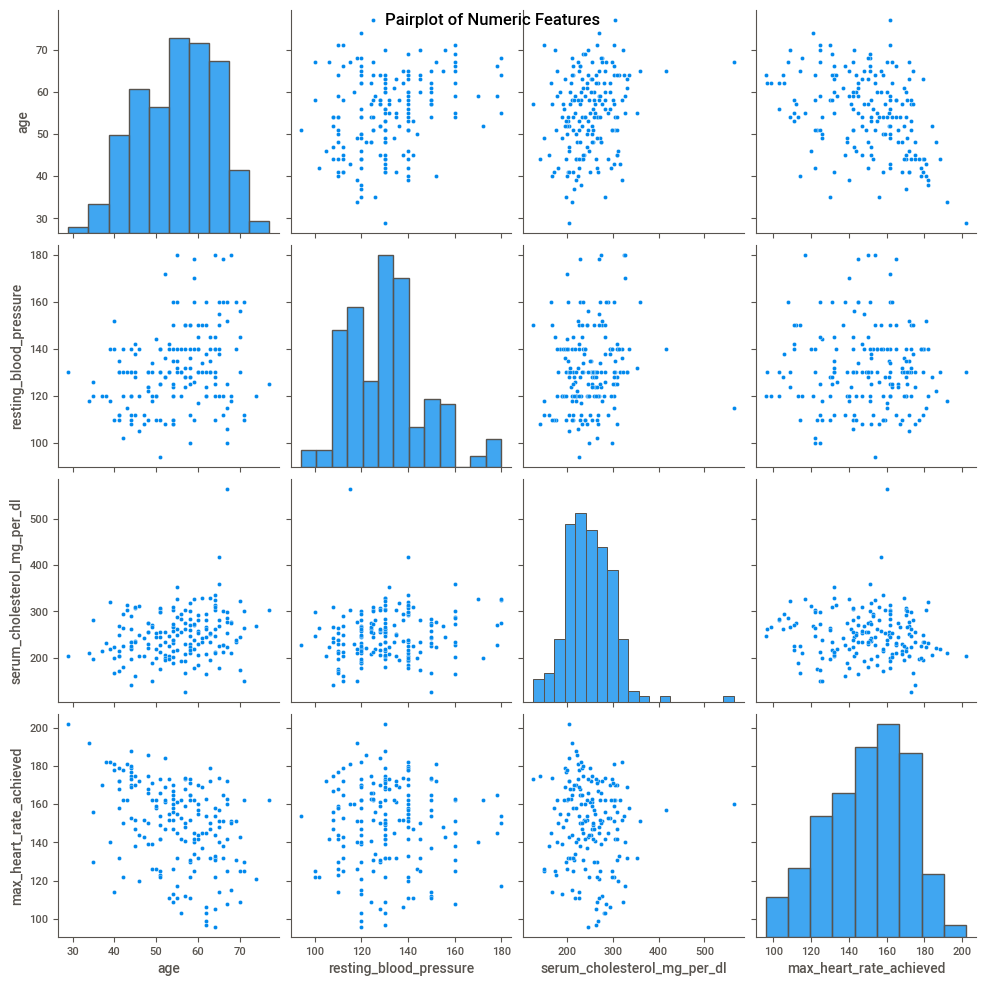

In [19]:
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved']
sns.pairplot(data,vars=numerical_features)
plt.suptitle('Pairplot of Numeric Features')
plt.show()

## Data Preprocessing

In [20]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [21]:
data['thal'].unique()
data['oldpeak_eq_st_depression'].unique()

array([0. , 1.6, 4.2, 2.6, 0.6, 3.4, 0.4, 0.2, 3.8, 0.9, 1.4, 0.1, 0.3,
       2.3, 1.5, 3. , 2. , 1. , 3.1, 2.5, 0.8, 2.4, 1.8, 1.9, 2.8, 1.2,
       0.5, 2.2, 1.3, 1.1, 0.7, 3.2, 5.6, 6.2])

In [22]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [23]:
cat_cols=['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina']
cat_cols

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina']

In [24]:
for col in cat_cols:
    print(f"Column: {col}")
    print("Unique Values : ",data[col].unique())
    print("Total Count : ",data[col].value_counts())
    print("*************************")

Column: slope_of_peak_exercise_st_segment
Unique Values :  [1 2 3]
Total Count :  slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
*************************
Column: thal
Unique Values :  ['normal' 'reversible_defect' 'fixed_defect']
Total Count :  thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
*************************
Column: chest_pain_type
Unique Values :  [2 3 4 1]
Total Count :  chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
*************************
Column: num_major_vessels
Unique Values :  [0 3 2 1]
Total Count :  num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
*************************
Column: fasting_blood_sugar_gt_120_mg_per_dl
Unique Values :  [0 1]
Total Count :  fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
*************************
Column: resting_ekg_results
Unique Values :  [2 0 1]
Total

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'resting_blood_pressure'),
  Text(0, 1.5, 'serum_cholesterol_mg_per_dl'),
  Text(0, 2.5, 'oldpeak_eq_st_depression'),
  Text(0, 3.5, 'age'),
  Text(0, 4.5, 'max_heart_rate_achieved')])

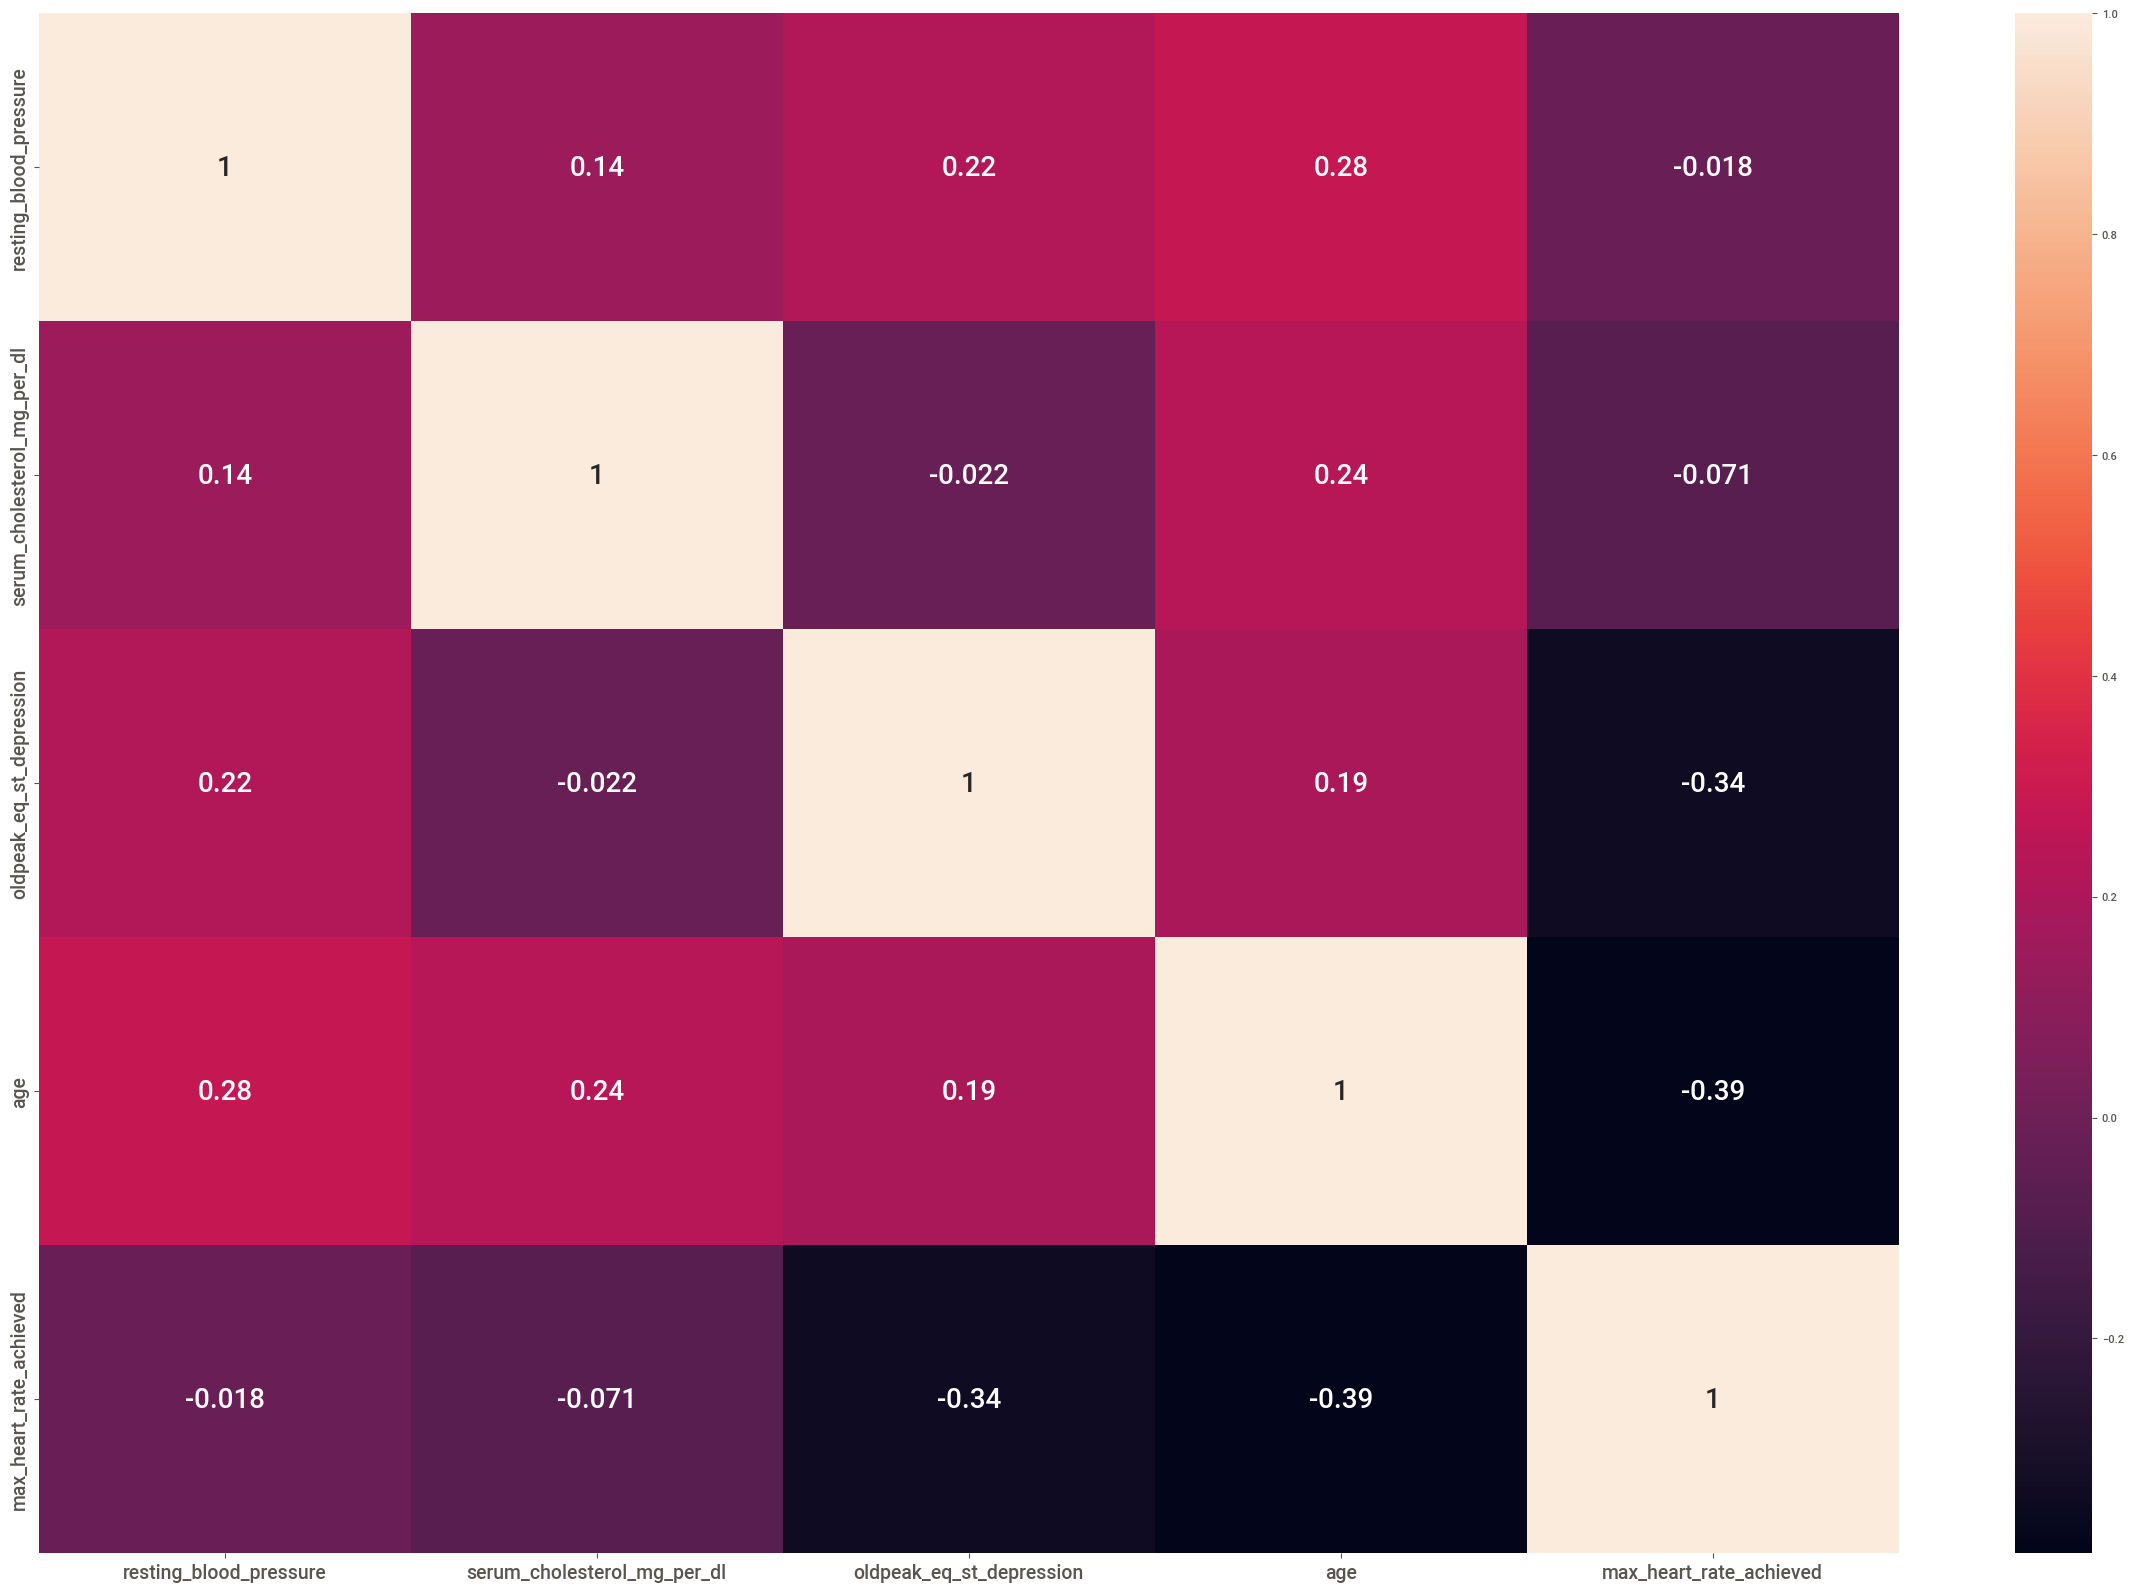

In [25]:
numerical_features=data.drop(['patient_id','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels',
                              'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina'],axis=1)
plt.figure(figsize=(30,20))
sns.heatmap(numerical_features.corr(),annot=True,annot_kws={"size":20})
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)

## Outlier Handeling

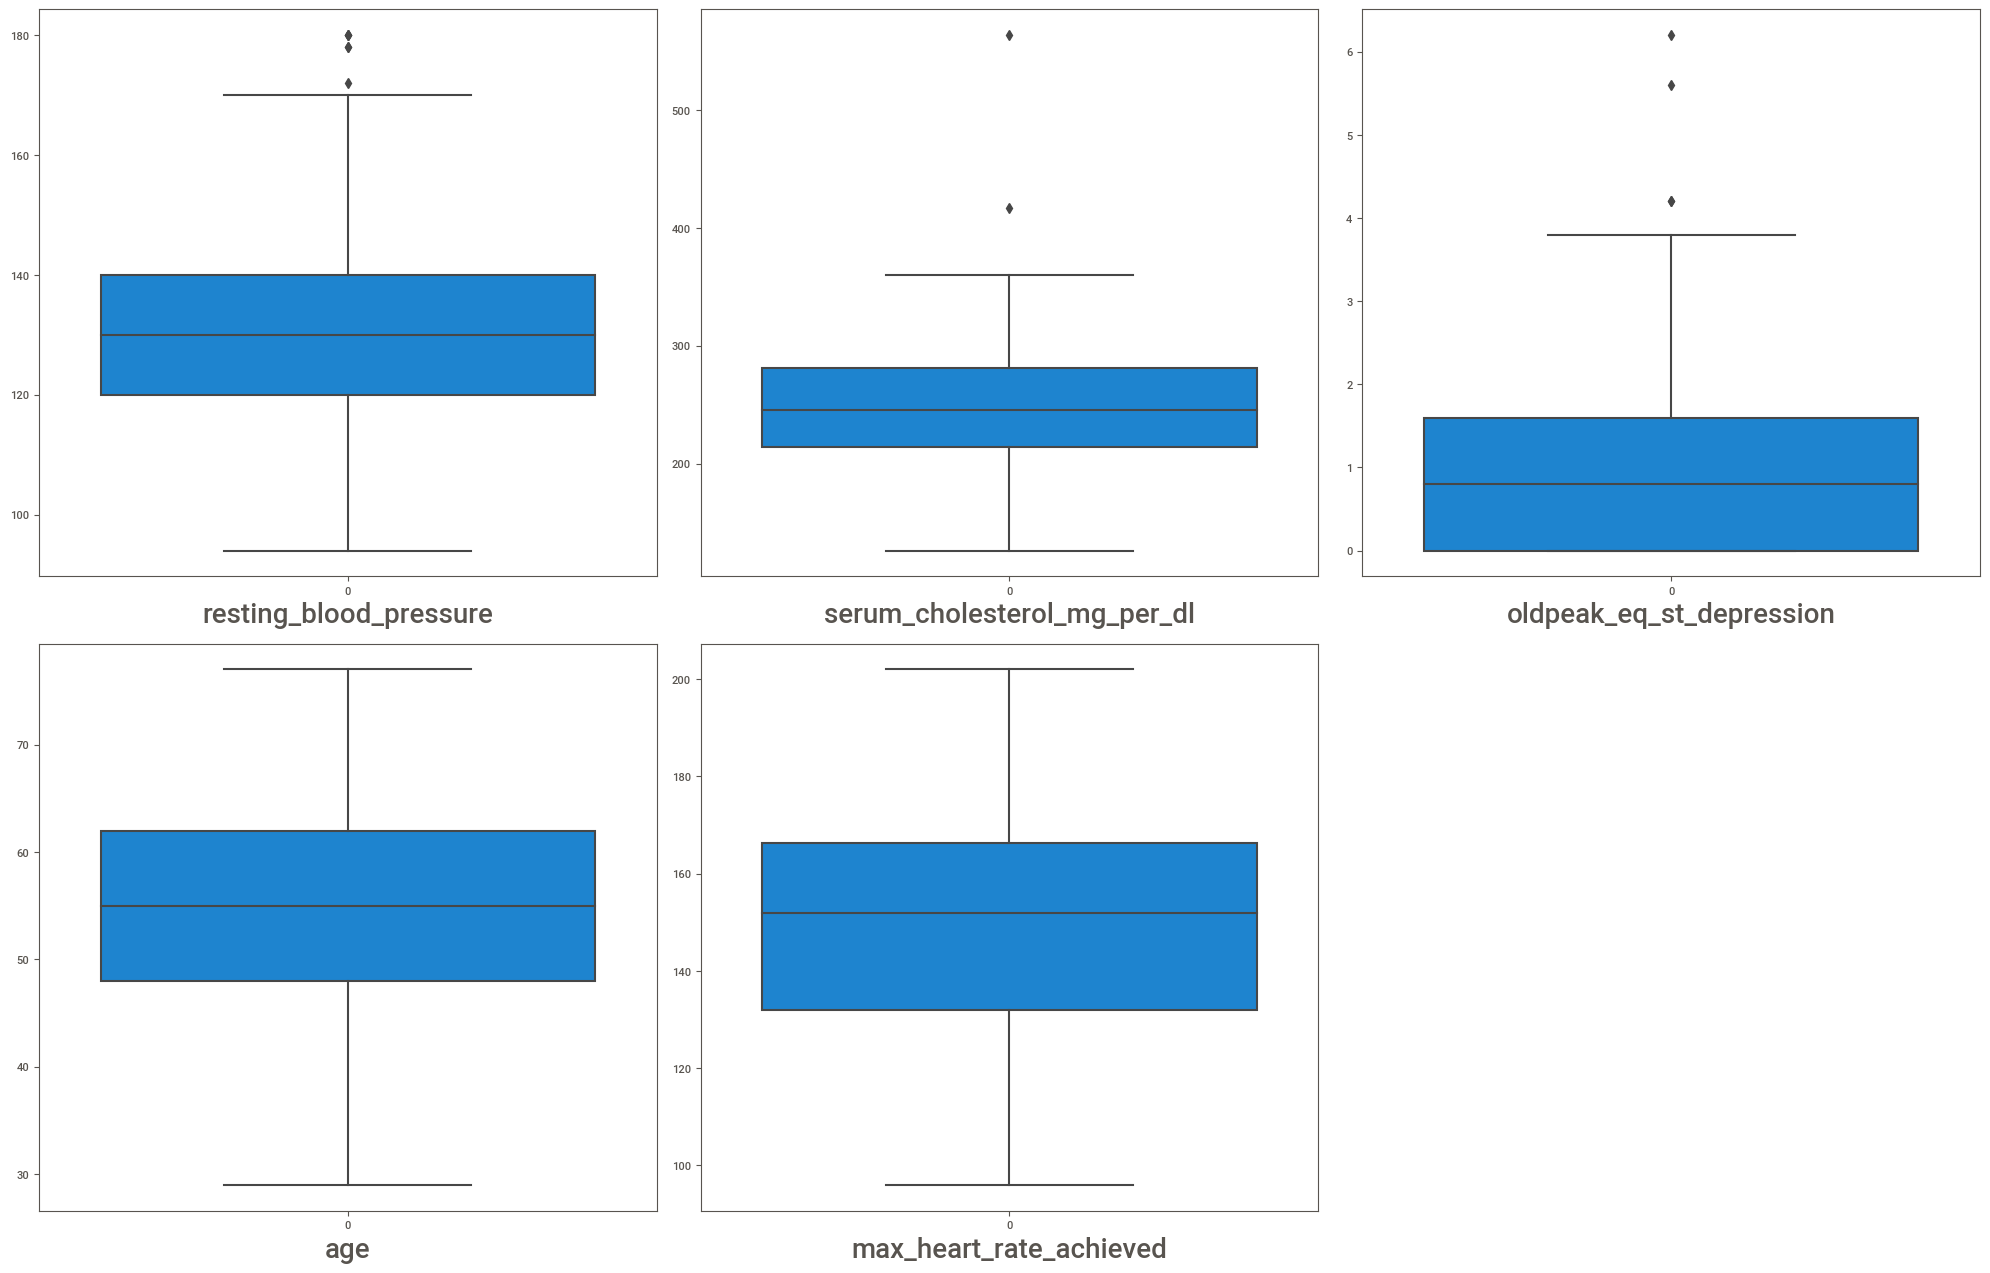

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in numerical_features:
    if plotnumber<=5:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()
        

### 1] Resting Blood Pressure

<Axes: xlabel='resting_blood_pressure', ylabel='Count'>

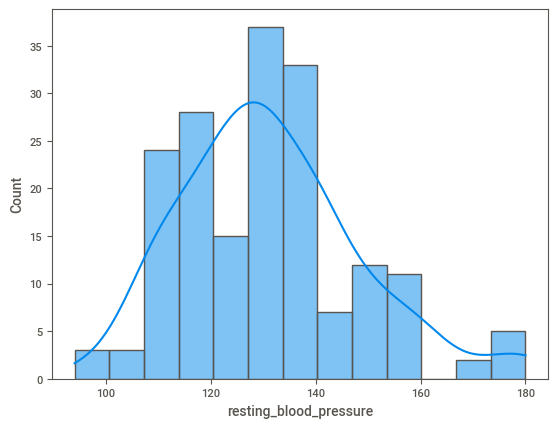

In [27]:
sns.histplot(data['resting_blood_pressure'],kde=True)

 - As stated in above figure resting blood pressure is slightly left skewed.

In [28]:
Q1=data.resting_blood_pressure.quantile(0.25)
Q3=data.resting_blood_pressure.quantile(0.75)
IQR=Q3-Q1
IQR

20.0

In [29]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

In [30]:
print(upper_limit)
print(lower_limit)

170.0
90.0


In [31]:
# Outliers Exceeding upperlimit
data.resting_blood_pressure.loc[data['resting_blood_pressure']>upper_limit]

4      178
33     180
72     172
75     178
113    180
176    180
Name: resting_blood_pressure, dtype: int64

In [32]:
# outliers below lowerlimit
data.resting_blood_pressure.loc[data['resting_blood_pressure']<lower_limit]

Series([], Name: resting_blood_pressure, dtype: int64)

In [33]:
(len(data.resting_blood_pressure.loc[data['resting_blood_pressure']>upper_limit])/len(data))*100

3.3333333333333335

In [34]:
data.loc[data['resting_blood_pressure']>upper_limit,'resting_blood_pressure']=np.median(data.resting_blood_pressure)

<Axes: >

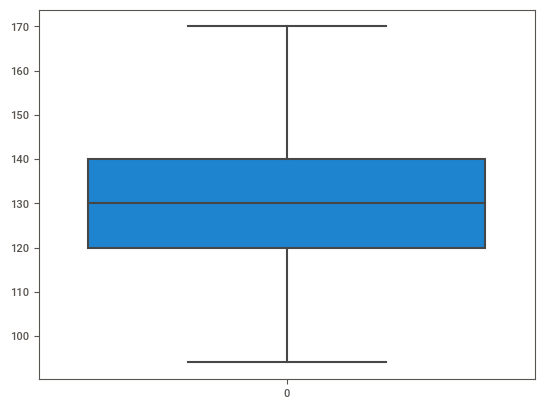

In [35]:
sns.boxplot(data['resting_blood_pressure'])

### 2]serum_cholesterol_mg_per_dl

<Axes: xlabel='serum_cholesterol_mg_per_dl', ylabel='Count'>

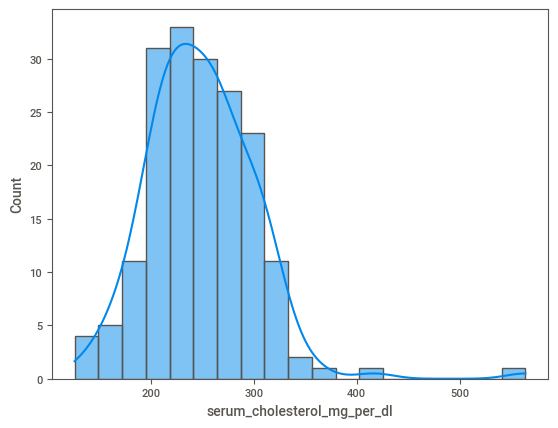

In [36]:
sns.histplot(data['serum_cholesterol_mg_per_dl'],kde=True)

 - As stated in above figure serum_cholesterol_mg_per_dl is left skewed.

In [37]:
Q1=data.serum_cholesterol_mg_per_dl.quantile(0.25)
Q3=data.serum_cholesterol_mg_per_dl.quantile(0.75)
IQR=Q3-Q1
IQR

67.5

In [38]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5
print(upper_limit)
print(lower_limit)

382.5
112.5


In [39]:
# Outliers exceeding upperlimit
data.serum_cholesterol_mg_per_dl.loc[data['serum_cholesterol_mg_per_dl']>upper_limit]

43    417
60    564
Name: serum_cholesterol_mg_per_dl, dtype: int64

In [40]:
# Outliers below lowerLimit
data.serum_cholesterol_mg_per_dl.loc[data['serum_cholesterol_mg_per_dl']<lower_limit]

Series([], Name: serum_cholesterol_mg_per_dl, dtype: int64)

In [41]:
data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit,'serum_cholesterol_mg_per_dl']=np.median(data.serum_cholesterol_mg_per_dl)

<Axes: >

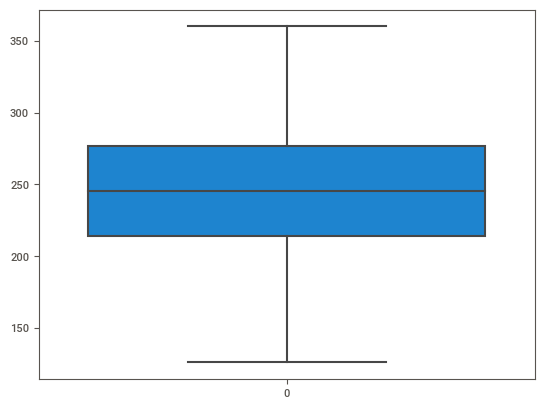

In [42]:
sns.boxplot(data['serum_cholesterol_mg_per_dl'])

### 3] oldpeak_eq_st_depression

In [43]:
print(    data['oldpeak_eq_st_depression'].min(),
    data['oldpeak_eq_st_depression'].max())

0.0 6.2


<Axes: xlabel='oldpeak_eq_st_depression', ylabel='Count'>

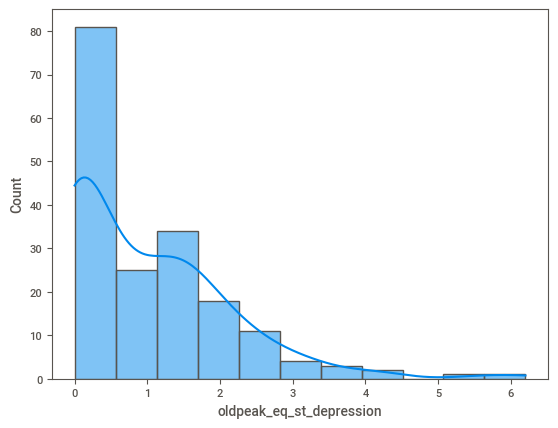

In [44]:
sns.histplot(data['oldpeak_eq_st_depression'],kde=True)

 - Oldpeak_eq_st_depression has left skewness

In [45]:
Q1=data.oldpeak_eq_st_depression.quantile(0.25)
Q3=data.oldpeak_eq_st_depression.quantile(0.75)
IQR=Q3-Q1
IQR

1.6

In [46]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5
print(upper_limit,lower_limit)

4.0 -2.4000000000000004


In [47]:
data.loc[data['oldpeak_eq_st_depression']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,oyt4ek,3,reversible_defect,130,1,0,0,2,270.0,4.2,1,59,145,0
112,6r9x2j,2,reversible_defect,140,4,3,0,0,298.0,4.2,1,51,122,1
140,noxsnw,3,reversible_defect,140,4,0,0,0,217.0,5.6,1,55,111,1
162,usnkhx,3,reversible_defect,160,4,3,0,2,164.0,6.2,0,62,145,0


In [48]:
data.loc[data['oldpeak_eq_st_depression']>upper_limit,'oldpeak_eq_st_depression']=np.median(data.oldpeak_eq_st_depression)

<Axes: >

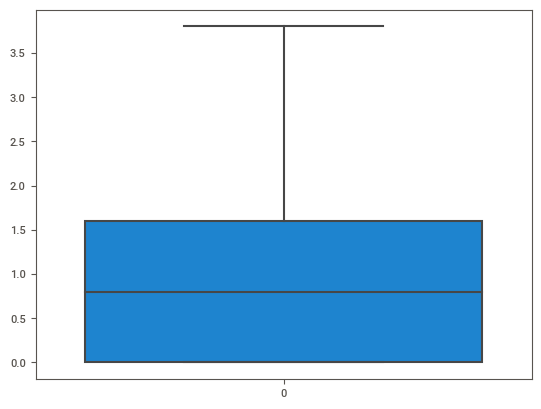

In [49]:
sns.boxplot(data['oldpeak_eq_st_depression'])

### 4] Age

<Axes: xlabel='age', ylabel='Count'>

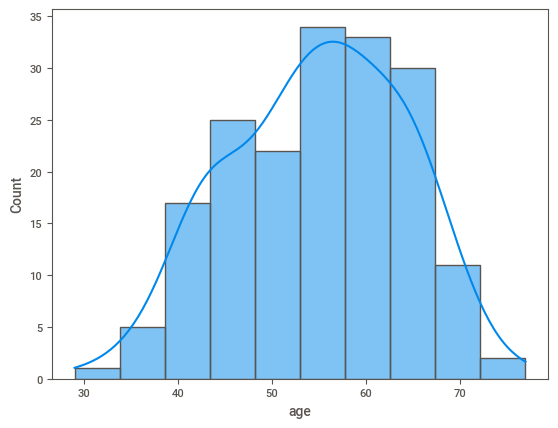

In [50]:
sns.histplot(data['age'],kde=True)

In [51]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
IQR=Q3-Q1
IQR

14.0

In [52]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5
print(upper_limit,lower_limit)

83.0 27.0


In [53]:
data.loc[data['age']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [54]:
data.loc[data['age']<lower_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


### 5] Max_heart_rate_achieved

<Axes: xlabel='max_heart_rate_achieved', ylabel='Count'>

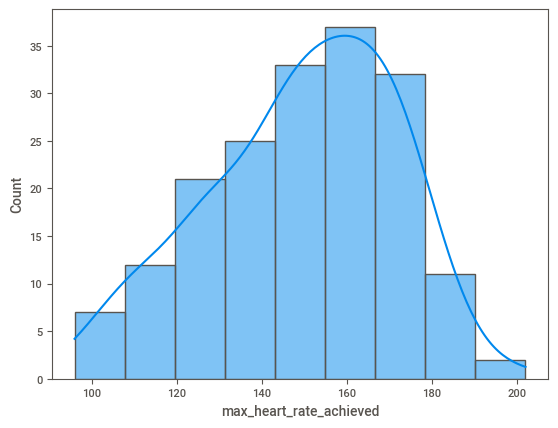

In [55]:
sns.histplot(data['max_heart_rate_achieved'],kde=True)

## Encoding

In [56]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [57]:
categorical_features=data.drop(['patient_id','resting_blood_pressure','serum_cholesterol_mg_per_dl',
                                'oldpeak_eq_st_depression','age','max_heart_rate_achieved'],axis=1)
categorical_features

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina
0,1,normal,2,0,0,2,1,0
1,2,normal,3,0,0,0,0,0
2,1,normal,4,3,0,2,1,1
3,1,reversible_defect,4,0,0,0,1,0
4,3,reversible_defect,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,1,0
176,2,normal,4,0,0,1,0,1
177,2,reversible_defect,3,0,0,0,1,1
178,1,normal,3,2,1,0,1,0


In [58]:
for i in categorical_features:
    print(categorical_features[i].value_counts())
    print("**********************************")

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
**********************************
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
**********************************
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
**********************************
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
**********************************
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
**********************************
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
**********************************
sex
1    124
0     56
Name: count, dtype: int64
**********************************
exercise_induced_angina
0    123
1     57
Name: count, dtype: int64
**********************************


**Using Frequency encoding to encode categorical data**

In [59]:
data.thal=data.thal.map({'normal':0,'reversible_defect':1,'fixed_defect':2})

In [60]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,0,128,2,0,0,2,308.0,0.0,1,45,170,0
1,ryoo3j,2,0,110,3,0,0,0,214.0,1.6,0,54,158,0
2,yt1s1x,1,0,125,4,3,0,2,304.0,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0
4,oyt4ek,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,1,125,4,2,1,0,254.0,0.2,1,67,163,0
176,2s2b1f,2,0,130,4,0,0,1,327.0,3.4,0,55,117,1
177,nsd00i,2,1,125,3,0,0,0,309.0,1.8,1,64,131,1
178,0xw93k,1,0,124,3,2,1,0,255.0,0.0,1,48,175,0


## Scaling The Data

In [61]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [62]:
df=data.drop(['patient_id'],axis=1)
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,128,2,0,0,2,308.0,0.0,1,45,170,0
1,2,0,110,3,0,0,0,214.0,1.6,0,54,158,0
2,1,0,125,4,3,0,2,304.0,0.0,1,77,162,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0
4,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,125,4,2,1,0,254.0,0.2,1,67,163,0
176,2,0,130,4,0,0,1,327.0,3.4,0,55,117,1
177,2,1,125,3,0,0,0,309.0,1.8,1,64,131,1
178,1,0,124,3,2,1,0,255.0,0.0,1,48,175,0


In [63]:
df=sc.fit_transform(data.drop(['patient_id'],axis=1))

In [64]:
df

array([[0.        , 0.        , 0.44736842, ..., 0.33333333, 0.69811321,
        0.        ],
       [0.5       , 0.        , 0.21052632, ..., 0.52083333, 0.58490566,
        0.        ],
       [0.        , 0.        , 0.40789474, ..., 1.        , 0.62264151,
        1.        ],
       ...,
       [0.5       , 0.5       , 0.40789474, ..., 0.72916667, 0.33018868,
        1.        ],
       [0.        , 0.        , 0.39473684, ..., 0.39583333, 0.74528302,
        0.        ],
       [0.        , 0.        , 0.86842105, ..., 0.52083333, 0.63207547,
        0.        ]])

In [65]:
df=pd.DataFrame(data=df,columns=[['slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']])

In [66]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0.0,0.447368,0.333333,0.000000,0.0,1.0,0.777778,0.000000,1.0,0.333333,0.698113,0.0
1,0.5,0.0,0.210526,0.666667,0.000000,0.0,0.0,0.376068,0.421053,0.0,0.520833,0.584906,0.0
2,0.0,0.0,0.407895,1.000000,1.000000,0.0,1.0,0.760684,0.000000,1.0,1.000000,0.622642,1.0
3,0.0,0.5,0.763158,1.000000,0.000000,0.0,0.0,0.414530,0.000000,1.0,0.229167,0.801887,0.0
4,1.0,0.5,0.473684,0.000000,0.000000,0.0,1.0,0.615385,0.210526,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,0.5,0.407895,1.000000,0.666667,1.0,0.0,0.547009,0.052632,1.0,0.791667,0.632075,0.0
176,0.5,0.0,0.473684,1.000000,0.000000,0.0,0.5,0.858974,0.894737,0.0,0.541667,0.198113,1.0
177,0.5,0.5,0.407895,0.666667,0.000000,0.0,0.0,0.782051,0.473684,1.0,0.729167,0.330189,1.0
178,0.0,0.0,0.394737,0.666667,0.666667,1.0,0.0,0.551282,0.000000,1.0,0.395833,0.745283,0.0


## Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

## Split data into train and test

In [67]:
X=df
y=data1['heart_disease_present']

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [69]:
y_train.value_counts()

heart_disease_present
0    84
1    60
Name: count, dtype: int64

## Model Creation


## _1] Logistic Regresion_

In [70]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [71]:
LR.fit(X_train,y_train)

LogisticRegression()

In [72]:
train_pred=LR.predict(X_train)
test_pred=LR.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [74]:
f1_score(test_pred,y_test)

0.8235294117647058

In [75]:
classification_report(y_test,test_pred)

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84        16\n           1       1.00      0.70      0.82        20\n\n    accuracy                           0.83        36\n   macro avg       0.86      0.85      0.83        36\nweighted avg       0.88      0.83      0.83        36\n'

In [76]:
confusion_matrix(y_test,test_pred)

array([[16,  0],
       [ 6, 14]], dtype=int64)

In [77]:
precision_score(y_test,test_pred)

1.0

In [78]:
recall_score(y_test,test_pred)

0.7

In [79]:
LOGCV = f1_score(test_pred,y_test)

## _2] Decision Tree_

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
dtree_pred=dtree.predict(X_test)

print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)

[[13  3]
 [ 6 14]]
75.0


In [81]:
DTREECV=f1_score(dtree_pred,y_test)

## _3] Random Forest_

In [82]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100)

RF.fit(X_train,y_train)

RF_test_predict=RF.predict(X_test)

RF_train_predict=RF.predict(X_train)

In [83]:
RF_train_accuracy=accuracy_score(RF_train_predict,y_train)
print("Training accuray of random forest",RF_train_accuracy)
print("Classification Report \n",classification_report(RF_train_predict,y_train))

Training accuray of random forest 1.0
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        60

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [84]:
RF_test_accuracy = accuracy_score(RF_test_predict,y_test)
print("Testing accuracy of random forest",RF_test_accuracy*100)
print("Precision Score:", precision_score(RF_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(RF_test_predict,y_test))

Testing accuracy of random forest 83.33333333333334
Precision Score: 85.41666666666666
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [85]:
RFCCV = f1_score(RF_test_predict,y_test)
print(RFCCV)

0.8333333333333334


In [86]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['sqrt','log2',None] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
RF_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
RF_cv = RandomizedSearchCV(estimator=RF_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
RF_cv.fit(X_train,y_train)

# Get best parameter
RF_best_params = RF_cv.best_params_
print(f"Best parameter: {RF_best_params}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 944, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [87]:
# Create object and place the best paramter
RF_clf1 = RandomForestClassifier(**RF_best_params)

# Fitting the training data
RF_clf1.fit(X_train,y_train)

# Prediction on test data
RF_clf1_predict = RF_clf1.predict(X_test)


In [88]:
RF_accuracy = accuracy_score(RF_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",RF_accuracy*100)
print("Classification report: \n",classification_report(RF_clf1_predict,y_test))

Accuracy after hyperparameter tunning 86.11111111111111
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.75      1.00      0.86        15

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.90      0.86      0.86        36



In [89]:
RFCCVT = f1_score(RF_clf1_predict,y_test)
print(RFCCVT)

0.8571428571428571


## _4] SVM_

In [90]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train,y_train)

svc_train_predict= svc.predict(X_train)

svc_test_predict=svc.predict(X_test)

**TRAINING ACCURACY**

In [91]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 92.36111111111111
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        85
           1       0.90      0.92      0.91        59

    accuracy                           0.92       144
   macro avg       0.92      0.92      0.92       144
weighted avg       0.92      0.92      0.92       144



**TESTING ACCURACY**

In [92]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 86.11111111111111
Prcision Score: 89.58333333333334
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.75      1.00      0.86        15

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.90      0.86      0.86        36



In [93]:
SVCCV = f1_score(svc_test_predict,y_test)

## _5] Naive Bayes_

In [94]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)

[[16  0]
 [ 7 13]]
81.0


In [95]:
GAUSIAN=f1_score(probs,y_test)

## _6] Gradient Boosting_

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)

[[14  2]
 [ 6 14]]
78.0


In [97]:
GBKCV = f1_score(gbkpred,y_test)

## _7] XGBoost_

In [98]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train,y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)

[[15  1]
 [ 4 16]]
86.0


In [99]:
XGB = f1_score(xgbprd,y_test)

In [100]:
models = pd.DataFrame({
                'Models': ["Logistic Regression","Decision Tree Classifier",
                           "Random Forest","SVM","Naive Bayes",'Gradient Boosting','XGboost'],
                'f1 Score':  [LOGCV,DTREECV,RFCCVT,SVCCV,GAUSIAN,GBKCV,XGB],
                     })


models.sort_values(by='f1 Score', ascending=False)

,Models,f1 Score
6,XGboost,0.864865
2,Random Forest,0.857143
3,SVM,0.857143
0,Logistic Regression,0.823529
4,Naive Bayes,0.787879
5,Gradient Boosting,0.777778
1,Decision Tree Classifier,0.756757


 - By comparing various Classification machine learning models,we found that **Random forest** is best suited for Prediction.

## Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

**1] Focus on high Risk groups**
 - *Gender-Specific priority*: Given that a higher proportion of males have heart disease, design gender-specific health campaigns and screenings.
 
 - *Chest Pain Management*: Implement protocols for rapid evaluation and management of patients with type 4 chest pain, as it has a higher association with heart disease.
 
 - *Fasting Blood Sugar Monitoring*: Regularly monitor and manage patients with fasting blood sugar levels > 120 mg/dl to prevent the onset of heart disease.
 
 - *Exercise Induced Angina*: Closely monitor and provide early intervention for patients showing exercise-induced angina.

**2]Specialized Treatment for recoverable symptomes**
 - *Thallium Stress Test Follow-Up*: Provide additional diagnostic tests and personalized care plans for patients with reversible defects in the thallium stress test, as they may indicate transient ischemia.
 - *Blood Pressure Management*: Initiate antihypertensive therapy and lifestyle modification programs for patients with borderline or mildly elevated resting blood pressure (120-130 mmHg).
 
**3]Research and improvement**
 - Continuously analyze patient data to refine risk factors and predictive models. Focus on updating and improving the models with new data and insights.
 - Collaborate with research institutions to stay updated on the latest advancements in heart disease prediction and prevention.
 
 **4] Preventive Measures**
 - Encourage patients to engage in regular physical activity tailored to their capabilities to improve cardiovascular health.
 - Offer exercise programs and classes within the hospital or through partnerships with local fitness centers.
 - Provide nutritional counseling and support for patients to adopt heart-healthy diets, focusing on reducing cholesterol and managing blood sugar levels.
 - Develop meal planning resources and workshops to help patients make healthier food choices